# Praktikum PCD 7 - Filter Median

Import Library

In [17]:
import matplotlib.pyplot as plt  # Mengimport modul matplotlib.pyplot sebagai plt

# Mengaktifkan mode inline untuk menampilkan plot secara langsung di notebook
%matplotlib inline

from skimage import data  # Mengimport modul data dari skimage untuk mengakses data citra bawaan
from skimage.io import imread  # Mengimport fungsi imread dari modul io dalam skimage untuk membaca citra
from skimage.color import rgb2gray  # Mengimport fungsi rgb2gray dari modul color dalam skimage untuk mengonversi citra RGB ke grayscale
import numpy as np  # Mengimport modul numpy sebagai np untuk operasi-operasi array


Load & Plot Input Image

Shape citra 1 :  (252, 250)
Shape citra 1 :  (636, 512)


Text(0.5, 1.0, 'Citra 2')

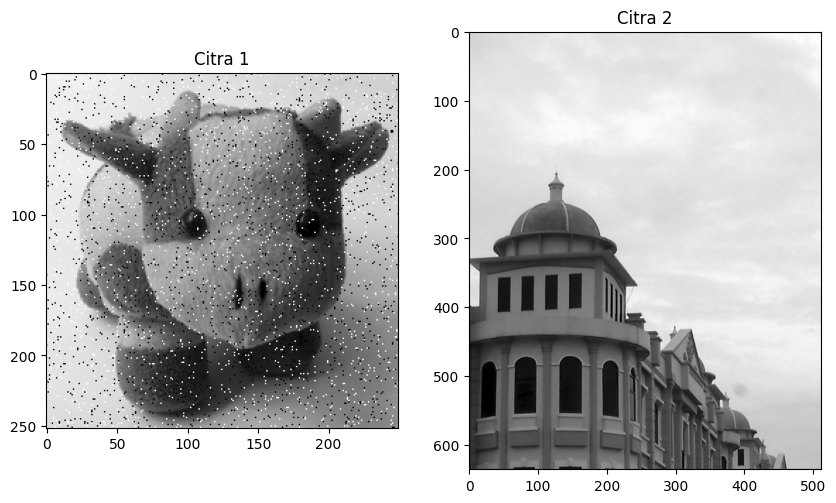

In [18]:
citra1 = imread(fname="boneka2.tif")  # Membaca citra dengan nama file "boneka2.tif" menggunakan fungsi imread dan menyimpannya dalam variabel citra1
citra2 = imread(fname="gedung.tif")  # Membaca citra dengan nama file "gedung.tif" menggunakan fungsi imread dan menyimpannya dalam variabel citra2

print('Shape citra 1 : ', citra1.shape)  # Menampilkan bentuk (shape) citra1
print('Shape citra 1 : ', citra2.shape)  # Menampilkan bentuk (shape) citra2

fig, axes = plt.subplots(1, 2, figsize=(10, 10))  # Membuat objek gambar dengan 1 baris dan 2 kolom menggunakan subplots, dengan ukuran (10, 10)
ax = axes.ravel()  # Melakukan perataan (flattening) pada objek axes menjadi array 1 dimensi

ax[0].imshow(citra1, cmap='gray')  # Menampilkan citra1 pada sumbu dengan menggunakan cmap 'gray'
ax[0].set_title("Citra 1")  # Memberikan judul "Citra 1" pada sumbu tersebut

ax[1].imshow(citra2, cmap='gray')  # Menampilkan citra2 pada sumbu dengan menggunakan cmap 'gray'
ax[1].set_title("Citra 2")  # Memberikan judul "Citra 2" pada sumbu tersebut


Code Asal Matlab

In [19]:
#%proses filter median untuk citra mobil
#for baris=2 : tinggiA-1
#    for kolom=2 : lebarA-1
#        dataA = [inputMobil(baris-1, kolom-1) inputMobil(baris-1, kolom) inputMobil(baris-1, kolom+1)  ...
#              inputMobil(baris, kolom-1) inputMobil(baris, kolom) inputMobil(baris, kolom+1)  ...
#              inputMobil(baris+1, kolom-1) inputMobil(baris+1, kolom) inputMobil(baris+1, kolom+1)];
#        % Urutkan
#        for i=1 : 8
#            for j=i+1 : 9
#                if dataA(i) > dataA(j)
#                    tmpA = dataA(i);
#                    dataA(i) = dataA(j);
#                    dataA(j) = tmpA;
#                end
#            end
#        end      
#        % Ambil nilai median
#        outputMobil(baris, kolom) = dataA(5);
#    end
#end

Menyiapkan variable output

In [20]:
copyCitra1 = citra1.copy()  # Meng-copy citra1 ke dalam variabel copyCitra1
copyCitra2 = citra2.copy()  # Meng-copy citra2 ke dalam variabel copyCitra2

m1, n1 = copyCitra1.shape  # Mendapatkan dimensi baris dan kolom dari copyCitra1
output1 = np.empty([m1, n1])  # Membuat array kosong dengan dimensi m1 x n1 sebagai output1

m2, n2 = copyCitra2.shape  # Mendapatkan dimensi baris dan kolom dari copyCitra2
output2 = np.empty([m2, n2])  # Membuat array kosong dengan dimensi m2 x n2 sebagai output2

print('Shape copy citra 1 : ', copyCitra1.shape)  # Menampilkan bentuk (shape) dari copyCitra1
print('Shape output citra 1 : ', output1.shape)  # Menampilkan bentuk (shape) dari output1

print('m1 : ', m1)  # Menampilkan nilai m1
print('n1 : ', n1)  # Menampilkan nilai n1
print()

print('Shape copy citra 2 : ', copyCitra2.shape)  # Menampilkan bentuk (shape) dari copyCitra2
print('Shape output citra 3 : ', output2.shape)  # Menampilkan bentuk (shape) dari output2
print('m2 : ', m2)  # Menampilkan nilai m2
print('n2 : ', n2)  # Menampilkan nilai n2
print()


Shape copy citra 1 :  (252, 250)
Shape output citra 1 :  (252, 250)
m1 :  252
n1 :  250

Shape copy citra 2 :  (636, 512)
Shape output citra 3 :  (636, 512)
m2 :  636
n2 :  512



Proses Filter Median Pada Citra Input 1

In [21]:
for baris in range(0, m1-1):  # Iterasi melalui setiap baris dalam range 0 hingga m1-1 pada citra 1
    for kolom in range(0, n1-1):  # Iterasi melalui setiap kolom dalam range 0 hingga n1-1 pada citra 1
        a1 = baris  # Variabel a1 mengambil nilai baris saat ini
        b1 = kolom  # Variabel b1 mengambil nilai kolom saat ini
        dataA = [copyCitra1[a1-1, b1-1], copyCitra1[a1-1, b1], copyCitra1[a1-1, b1+1], \
              copyCitra1[a1, b1-1], copyCitra1[a1, b1], copyCitra1[a1, b1+1], \
              copyCitra1[a1+1, b1-1], copyCitra1[a1+1, b1], copyCitra1[a1+1, b1+1]]  # Mengumpulkan data piksel sekitar a1, b1 dalam array dataA
        
        # Urutkan
        for i in range(1, 8):  # Iterasi melalui indeks 1 hingga 7
            for j in range(i, 9):  # Iterasi melalui indeks i hingga 8
                if dataA[i] > dataA[j]:  # Jika nilai dataA[i] lebih besar dari dataA[j], lakukan pertukaran nilai
                    tmpA = dataA[i]
                    dataA[i] = dataA[j]
                    dataA[j] = tmpA
        
        output1[a1, b1] = dataA[5]  # Nilai piksel pada output1[a1, b1] diisi dengan nilai dataA indeks ke-5


Proses Filter Median Pada Citra Input 2

In [22]:
for baris in range(0, m2-1):  # Iterasi melalui setiap baris dalam range 0 hingga m2-1 pada citra 2
    for kolom in range(0, n2-1):  # Iterasi melalui setiap kolom dalam range 0 hingga n2-1 pada citra 2
        a1 = baris  # Variabel a1 mengambil nilai baris saat ini
        b1 = kolom  # Variabel b1 mengambil nilai kolom saat ini
        dataA = [copyCitra2[a1-1, b1-1], copyCitra2[a1-1, b1], copyCitra2[a1-1, b1+1], \
              copyCitra2[a1, b1-1], copyCitra2[a1, b1], copyCitra2[a1, b1+1], \
              copyCitra2[a1+1, b1-1], copyCitra2[a1+1, b1], copyCitra2[a1+1, b1+1]]  # Mengumpulkan data piksel sekitar a1, b1 dalam array dataA
        
        # Urutkan
        for i in range(1, 8):  # Iterasi melalui indeks 1 hingga 7
            for j in range(i, 9):  # Iterasi melalui indeks i hingga 8
                if dataA[i] > dataA[j]:  # Jika nilai dataA[i] lebih besar dari dataA[j], lakukan pertukaran nilai
                    tmpA = dataA[i]
                    dataA[i] = dataA[j]
                    dataA[j] = tmpA
        
        output2[a1, b1] = dataA[5]  # Nilai piksel pada output2[a1, b1] diisi dengan nilai dataA indeks ke-5


Plot Citra Input dan Output Hasil dari Filter Rerata

Text(0.5, 1.0, 'Output Citra 2')

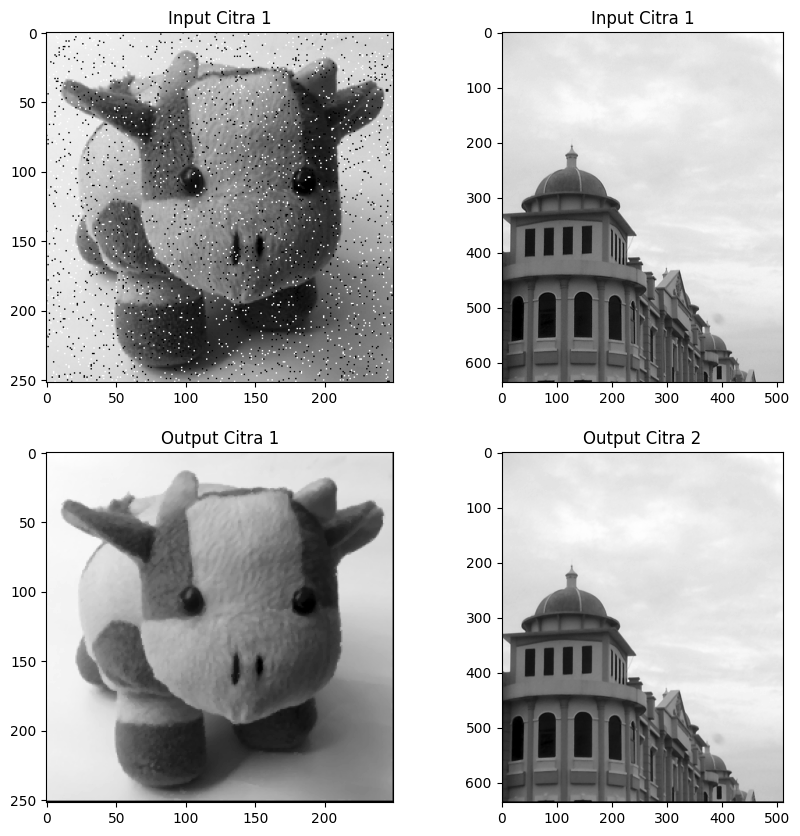

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))  # Membuat subplots dengan ukuran 2x2 dan ukuran figur 10x10
ax = axes.ravel()  # Meratakan array axes menjadi 1 dimensi

ax[0].imshow(citra1, cmap='gray')  # Menampilkan citra 1 pada subplot indeks 0
ax[0].set_title("Input Citra 1")  # Mengatur judul subplot indeks 0

ax[1].imshow(citra2, cmap='gray')  # Menampilkan citra 2 pada subplot indeks 1
ax[1].set_title("Input Citra 1")  # Mengatur judul subplot indeks 1

ax[2].imshow(output1, cmap='gray')  # Menampilkan output citra 1 pada subplot indeks 2
ax[2].set_title("Output Citra 1")  # Mengatur judul subplot indeks 2

ax[3].imshow(output2, cmap='gray')  # Menampilkan output citra 2 pada subplot indeks 3
ax[3].set_title("Output Citra 2")  # Mengatur judul subplot indeks 3
